In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("data\Scrapping_03-12-23_12-10-44.csv", na_values = "--", date_parser = "data")
df.sample(10)

,nazwa_pociagu,stacja_poczatkowa,stacja_koncowa,stacja_pomiaru,data,czas_rozkladowy,czas_przyjazdu,opoznienie
64717,MHE 53172/3 ROZEWIE,Gdynia Główna,Kraków Główny,Rawicz,10.03,03:55,03:54,-1.0
49758,MPE 83101/0 GÓRSKI,Szczecin Główny,Rzeszów Główny,Krzyż,10.03,14:17,14:18,1.0
32859,EIJ 5422/3 SKARBEK,Olsztyn Główny,Racibórz,Koluszki,01.03,19:46,19:53,7.0
13170,ECE 14000/1 SILESIA,Warszawa Wschodnia,Bohumin,Zawiercie,08.03,07:27,07:27,0.0
18867,MPE 54100/1 DOKER,Gdynia Główna,Katowice,Laskowice Pomorskie,05.03,08:14,08:13,-1.0
72367,MPE 58108/9 STAŃCZYK,Olsztyn Główny,Szczecin Główny,Szczecin Główny,10.03,22:57,23:18,21.0
55725,EIE 5314/5 ARTUS,Gdynia Główna,Przemyśl Główny,Rawicz,01.03,14:35,14:45,10.0
73566,EIJ 1530/1 BRDA,Warszawa Centralna,Bydgoszcz Główna,Bydgoszcz Leśna,05.03,22:46,22:54,8.0
29084,MPE 84101/0 GWAREK,Słupsk,Katowice,Kościan,06.03,19:15,19:14,-1.0
68517,MPE 85102/3 ŻUŁAWY,Szczecin Główny,Olsztyn Główny,Rumia,03.03,19:18,23:13,235.0


### Podstawowe statystyki

In [4]:
df.describe()

,opoznienie
count,90174.000000
mean,5.506255
std,17.860394
min,-22.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,441.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92548 entries, 0 to 92547
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nazwa_pociagu      92548 non-null  object 
 1   stacja_poczatkowa  92548 non-null  object 
 2   stacja_koncowa     92548 non-null  object 
 3   stacja_pomiaru     92548 non-null  object 
 4   data               92548 non-null  object 
 5   czas_rozkladowy    92548 non-null  object 
 6   czas_przyjazdu     92548 non-null  object 
 7   opoznienie         90174 non-null  float64
dtypes: float64(1), object(7)
memory usage: 5.6+ MB


In [6]:
df["nazwa_pociagu"].nunique() #ile pociagow, przeciwne kierunki liczone osobno

423

In [7]:
df["stacja_pomiaru"].nunique() #ile stacji

465

In [8]:
df[df["opoznienie"] == max(df["opoznienie"])]

,nazwa_pociagu,stacja_poczatkowa,stacja_koncowa,stacja_pomiaru,data,czas_rozkladowy,czas_przyjazdu,opoznienie
72700,MPE 85100/1 ALBATROS,Szczecin Główny,Gdańsk Główny,Sopot,08.03,22:29,05:50,441.0
72701,MPE 85100/1 ALBATROS,Szczecin Główny,Gdańsk Główny,Gdańsk Oliwa,08.03,22:34,05:55,441.0
72702,MPE 85100/1 ALBATROS,Szczecin Główny,Gdańsk Główny,Gdańsk Wrzeszcz,08.03,22:38,05:59,441.0


In [9]:
df[df["opoznienie"] == min(df["opoznienie"])]

,nazwa_pociagu,stacja_poczatkowa,stacja_koncowa,stacja_pomiaru,data,czas_rozkladowy,czas_przyjazdu,opoznienie
4597,MHE 38170/1 USTRONIE,Kraków Główny,Kołobrzeg,Słupsk,03.03,08:21,07:59,-22.0


### Rozkład opóźnień

Text(0.5, 0, 'Opóźnienie')

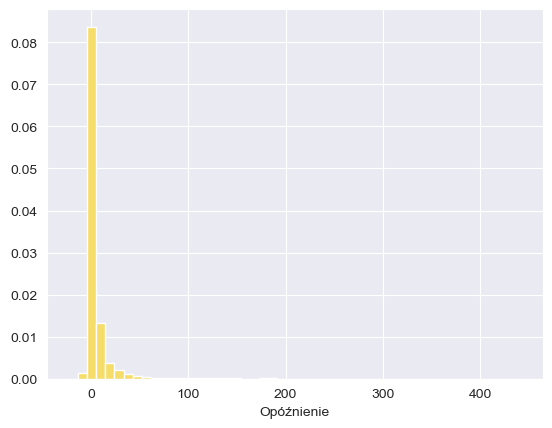

In [10]:
plt.hist(df["opoznienie"], density = True, bins = 50, color = "#f6dc68")
plt.xlabel("Opóźnienie")

### Które pociągi mają największe opóźnienie?

In [11]:
df2 = df[df["stacja_koncowa"] == df["stacja_pomiaru"]]
df2["nazwa_pociagu"] = df2["nazwa_pociagu"].str.split().apply(lambda x: " ".join(x[2:]))

C:\Users\klaud\AppData\Local\Temp\ipykernel_8492\755504090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["nazwa_pociagu"] = df2["nazwa_pociagu"].str.split().apply(lambda x: " ".join(x[2:]))


In [12]:
mean_train_delay = df2.groupby("nazwa_pociagu").mean().reset_index().sort_values(by = "opoznienie")
mean_train_delay

C:\Users\klaud\AppData\Local\Temp\ipykernel_8492\72687518.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_train_delay = df2.groupby("nazwa_pociagu").mean().reset_index().sort_values(by = "opoznienie")


,nazwa_pociagu,opoznienie
71,MARSZAŁEK PIŁSUDSKI,-2.083333
70,MAMRY,-0.625000
122,STARZYŃSKI,0.000000
85,NIEGOCIN,0.041667
48,JAGIEŁŁO,0.125000
...,...,...
18,BRYZA,18.125000
124,STAŃCZYK,19.361111
66,LUBOMIRSKI,21.687500
89,OLEŃKA,22.333333


[]

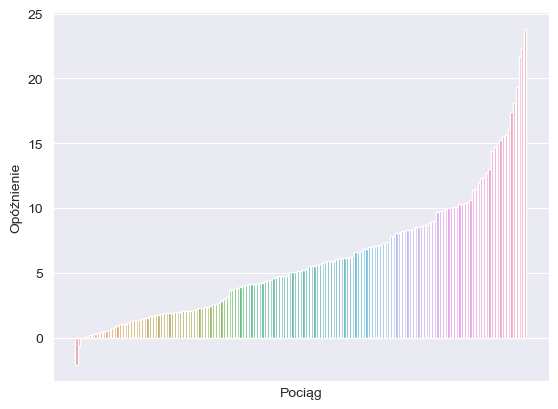

In [13]:
sns.barplot(x = "nazwa_pociagu", y = "opoznienie", data = mean_train_delay)
plt.xticks([])
plt.xlabel("Pociąg")
plt.ylabel("Opóźnienie")
plt.plot()

### Rodzaje pociągów

In [14]:
df.insert(1, "kod_pociagu", df["nazwa_pociagu"].apply(lambda x: x.split()[0]))
train_types = df.groupby("kod_pociagu").count()["nazwa_pociagu"]
train_types

kod_pociagu
ECE     4140
EIE    10404
EIJ    22464
ENE      672
MHE     6052
MME     2760
MPE    38700
MPJ     2568
MPM     1932
MPS     2856
Name: nazwa_pociagu, dtype: int64

<Axes: >

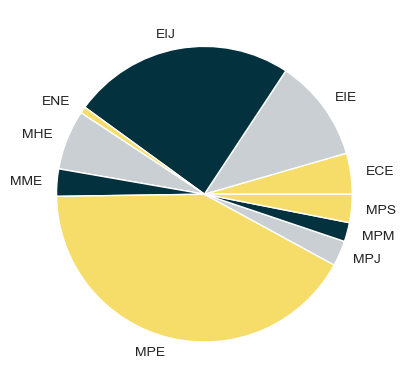

In [15]:
train_types.plot.pie(label = "", colors = ["#f6dc68", "#c9cfd3", "#03313d"])

### Kiedy są największe opóźnienia?

In [16]:
df["data"]  = df["data"].apply(lambda x: datetime.strptime(x[:5] + ".2023" if int(x.split(".")[1]) < 10 else x[:5] + ".2022", "%d.%m.%Y").date())
df.insert(6, "dzien_tygodnia", df["data"].apply(lambda x: x.weekday())) # 0 - pon, 6 - nd
df

,nazwa_pociagu,kod_pociagu,stacja_poczatkowa,stacja_koncowa,stacja_pomiaru,data,dzien_tygodnia,czas_rozkladowy,czas_przyjazdu,opoznienie
0,EIJ 3104/5,EIJ,Kraków Główny,Warszawa Gdańska,Kraków Główny,2023-03-10,4,18:04,18:04,0.0
1,EIJ 3104/5,EIJ,Kraków Główny,Warszawa Gdańska,Warszawa Gdańska,2023-03-10,4,20:31,20:27,-4.0
2,EIJ 3104/5,EIJ,Kraków Główny,Warszawa Gdańska,Kraków Główny,2023-03-09,3,18:04,18:04,0.0
3,EIJ 3104/5,EIJ,Kraków Główny,Warszawa Gdańska,Warszawa Gdańska,2023-03-09,3,20:31,20:28,-3.0
4,EIJ 3104/5,EIJ,Kraków Główny,Warszawa Gdańska,Kraków Główny,2023-03-08,2,18:04,18:04,0.0
...,...,...,...,...,...,...,...,...,...,...
92543,MPE 83152/3 LUBOMIRSKI,MPE,Kołobrzeg,Kraków Główny,Warszawa Zachodnia,2022-12-24,5,14:00,14:26,26.0
92544,MPE 83152/3 LUBOMIRSKI,MPE,Kołobrzeg,Kraków Główny,Opoczno Południe,2022-12-24,5,15:08,15:49,41.0
92545,MPE 83152/3 LUBOMIRSKI,MPE,Kołobrzeg,Kraków Główny,Włoszczowa Północ,2022-12-24,5,15:41,16:28,47.0
92546,MPE 83152/3 LUBOMIRSKI,MPE,Kołobrzeg,Kraków Główny,Miechów,2022-12-24,5,16:18,16:58,40.0


In [17]:
mean_delay_weekday = df.groupby("dzien_tygodnia").mean()
mean_delay_weekday

C:\Users\klaud\AppData\Local\Temp\ipykernel_8492\1226082379.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_delay_weekday = df.groupby("dzien_tygodnia").mean()


,opoznienie
dzien_tygodnia,
0,4.126171
1,3.671549
2,7.034063
3,5.045924
4,9.076769
5,4.921201
6,3.495652


Text(0, 0.5, 'Opóźnienie')

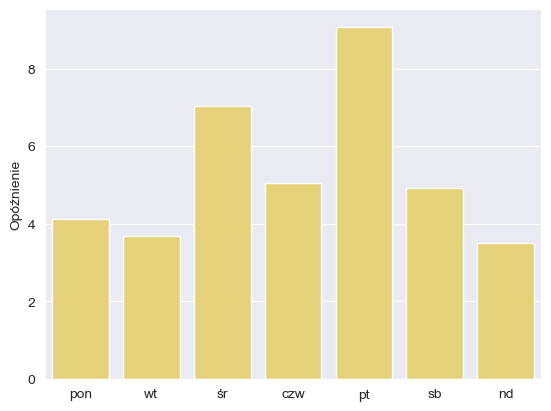

In [18]:
sns.barplot(x = ["pon", "wt", "śr", "czw", "pt", "sb", "nd"], y = "opoznienie", data = mean_delay_weekday, color = "#f6dc68")
plt.ylabel("Opóźnienie")